In [10]:
import pandas as pd
import numpy as np

In [11]:
import pickle
def save_data(data, outfile):
    with open(outfile, 'wb') as outf:
        pickle.dump(data, outf)

def load_data(infile):
    with open(infile, 'rb') as inf:
        data = pickle.load(inf)
    return data

In [12]:
x_train,y_train=load_data('train_data.pkl')
x_test1,y_test1,test1_star=load_data('test1_data.pkl')
x_test2,y_test2,test2_lab=load_data('test2_data.pkl')

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
def test_test2_auc(rfc,x_train, y_train,x_test,y_test,x_test2,y_test2):
    x_tra, x_val, y_tra, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=123)
    rfc.fit(x_tra, y_tra)
    y_val_pred_prob=rfc.predict_proba(x_val)[:,1]
    fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
    val_auc= auc(fpr, tpr)
#     print('val auc ',val_auc)
    rfc.fit(x_train, y_train)
    y_test_pred_prob=rfc.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
    test1_auc=auc(fpr, tpr)
#     print('test1 auc ',test1_auc)
    y_test2_pred_prob=rfc.predict_proba(x_test2)[:,1]
    fpr2, tpr2, _ = roc_curve(y_test2, y_test2_pred_prob)
    test2_auc=auc(fpr2, tpr2)
#     print('test2 auc ',test2_auc)
    return val_auc,test1_auc,test2_auc
    
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=123)
test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)

(0.99594958826124, 0.996204729362165, 0.9405536814700889)

In [16]:
#loss loss{‘deviance’, ‘exponential’}, default=’deviance’
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=123,loss='exponential')
test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)

(0.9964954725402844, 0.9974628977968176, 0.9551443411178997)

In [17]:
#learning_ratefloat, default=0.1
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.0001,0.001,0.01,0.2,0.3,0.4]:
    
    clf = GradientBoostingClassifier(random_state=123,loss='exponential',
                                    learning_rate=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#0.3 (0.9970447159481876, 0.9966115389410218, 0.9673931393517861)

0.0001 (0.9648236160195305, 0.9865081967677592, 0.9276479224584285)
0.001 (0.9683909850283627, 0.9883762041570333, 0.9341251487968012)
0.01 (0.9928485180169461, 0.9966701573054081, 0.9204427427090742)
0.2 (0.9966650568687596, 0.9960369605376491, 0.9646402076907394)
0.3 (0.9970447159481876, 0.9966115389410218, 0.9673931393517861)
0.4 (0.9969603759743734, 0.994888769889841, 0.959511547782681)


In [18]:
#n_estimatorsint, default=100
from sklearn.ensemble import GradientBoostingClassifier
for para in [10,20,40,60,80,100,120,140,160,180,200,300]:
    
    clf = GradientBoostingClassifier(random_state=123,loss='exponential',learning_rate=0.3,
                                    n_estimators=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)
    
#140 (0.9971771948224972, 0.9963425245931367, 0.9682066626674346)

10 (0.9941517566564368, 0.9974780730087492, 0.914823490822279)
20 (0.9960134117095615, 0.9975111037445035, 0.9390873665056638)
40 (0.9965201750571245, 0.9975553345573236, 0.9619740203368938)
60 (0.9966796303201173, 0.9968272190489144, 0.9620918129110996)
80 (0.9967767866625014, 0.996728866335736, 0.9680716797761306)
100 (0.9970447159481876, 0.9966115389410218, 0.9673931393517861)
120 (0.9970426229525141, 0.9965389920213972, 0.9699591795295062)
140 (0.9971771948224972, 0.9963425245931367, 0.9682066626674346)
160 (0.9970687466392563, 0.9965426894918173, 0.9658037029616552)
180 (0.9970068353104392, 0.9961545230971486, 0.9649873170398292)
200 (0.9970377909748477, 0.9963667748991343, 0.9664522814413395)
300 (0.9970026234796387, 0.9961040590008614, 0.9625296301759444)


In [19]:
#subsamplefloat, default=1.0
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.2,0.5,0.6,0.7,0.8,0.9]:
    clf = GradientBoostingClassifier(random_state=123,
                                     loss='exponential',learning_rate=0.3,n_estimators=140,
                                    subsample=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#0.9 (0.9971475052912738, 0.9970165607008478, 0.9703581093904287)

0.2 (0.9964453440019267, 0.9969619656376083, 0.9615301989390916)
0.5 (0.9969205315382149, 0.9969401491454735, 0.9577451142505762)
0.6 (0.9967384667540558, 0.9973641285869713, 0.9690235917504328)
0.7 (0.9970667053224879, 0.996635800580262, 0.9544406978393811)
0.8 (0.996941228939877, 0.9964942568792784, 0.9638089068567257)
0.9 (0.9971475052912738, 0.9970165607008478, 0.9703581093904287)


In [21]:
#criterion{‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}, default=’friedman_mse’
from sklearn.ensemble import GradientBoostingClassifier
for para in ['squared_error']:
    clf = GradientBoostingClassifier(random_state=123,
                                     loss='exponential',learning_rate=0.3,n_estimators=140,subsample=0.9,
                                    criterion=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#squared_error (0.997210398519296, 0.9970167136996237, 0.9703512684956654)

squared_error (0.997210398519296, 0.9970167136996237, 0.9703512684956654)


In [22]:
#min_samples_splitint or float, default=2
from sklearn.ensemble import GradientBoostingClassifier
for para in [2,4,6,8,10,20]:
    clf = GradientBoostingClassifier(random_state=123,
            loss='exponential',learning_rate=0.3,n_estimators=140,subsample=0.9,
            criterion='squared_error',
            min_samples_split=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#4 (0.9972250753284648, 0.9969699754068635, 0.9667510494461048)

2 (0.997210398519296, 0.9970167136996237, 0.9703512684956654)
4 (0.9972250753284648, 0.9969699754068635, 0.9667510494461048)
6 (0.9971778408088162, 0.9969116998730677, 0.9619465246375559)
8 (0.9970378426537532, 0.9971704434697856, 0.9661075649374138)
10 (0.997228511975682, 0.99716566084138, 0.966105392292725)
20 (0.9971312522754868, 0.997312601999184, 0.9615554045534874)


In [24]:
#max_depthint, default=3
from sklearn.ensemble import GradientBoostingClassifier
for para in [2,4,5,6,8,10,20,40]:
    clf = GradientBoostingClassifier(random_state=123,
            loss='exponential',learning_rate=0.3,n_estimators=140,subsample=0.9,
            criterion='squared_error',min_samples_split=4,
            max_depth=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#5 (0.9974305248173732, 0.9968597284555056, 0.9704582125264594)

2 (0.9965696059302577, 0.9973515345210572, 0.959058066924033)
4 (0.9973640657448701, 0.9962207970669568, 0.9476015940400481)
5 (0.9974305248173732, 0.9968597284555056, 0.9704582125264594)
6 (0.9968847438961399, 0.9966405605421824, 0.964559261996052)
8 (0.9957960243934769, 0.9967704225032866, 0.9670742450235867)
10 (0.9945021913147917, 0.9964666689333151, 0.9577450408504179)
20 (0.99107236571301, 0.9941997200689061, 0.9193924158023846)
40 (0.99102942054252, 0.9921486213110295, 0.9372426296845743)


In [32]:
#min_samples_leafint or float, default=1
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.0001,0.001,0.01,0.1,0.2,0.3,0.4 ,0.5]:
    clf = GradientBoostingClassifier(random_state=123,
            loss='exponential',learning_rate=0.3,n_estimators=140,subsample=0.9,
            criterion='squared_error',min_samples_split=4,max_depth=5,
            min_samples_leaf=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.0001 (0.997160295820391, 0.9967882071943425, 0.9643953154022422)
0.001 (0.9974744002081626, 0.996243537218369, 0.936636902217366)
0.01 (0.9971020278544134, 0.9965409130060292, 0.8750283911812704)
0.1 (0.9957728980832552, 0.9980970097239222, 0.9637415548713748)
0.2 (0.9808851873011493, 0.9719518988848088, 0.9215946847950572)
0.3 (0.8312944454737159, 0.7507034458724331, 0.43432243374255786)
0.4 (0.821036260245666, 0.7647545559635522, 0.43788165146363434)
0.5 (0.5, 0.5, 0.5)


In [33]:
#min_weight_fraction_leaffloat, default=0.0
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.001,0.01,0.1,0.2,0.5]:
    clf = GradientBoostingClassifier(random_state=123,
            loss='exponential',learning_rate=0.3,n_estimators=140,subsample=0.9,
            criterion='squared_error',min_samples_split=4,max_depth=5,                     
            min_samples_leaf=1,
            min_weight_fraction_leaf=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.001 (0.9974719971390558, 0.996583497665352, 0.9576349993329394)
0.01 (0.9971529057369011, 0.9962818889115553, 0.9037862209229677)
0.1 (0.9960081146217452, 0.998186879504964, 0.9659663723927089)
0.2 (0.9827961957090489, 0.9733970658234733, 0.9279874715912027)
0.5 (0.7883375438721609, 0.5, 0.5)


In [35]:
#min_impurity_decreasefloat, default=0.0
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.001,0.01,0.1,0.2]:
    clf = GradientBoostingClassifier(random_state=123,
            loss='exponential',learning_rate=0.3,n_estimators=140,subsample=0.9,
            criterion='squared_error',min_samples_split=4,max_depth=5,
            min_samples_leaf=1,min_weight_fraction_leaf=0,
            min_impurity_decrease=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.001 (0.9951801151974484, 0.9976812525499795, 0.9673827165292928)
0.01 (0.9912460585144744, 0.9981374014007888, 0.9667113986805353)
0.1 (0.979869722647066, 0.9970216804932228, 0.9696835325746379)
0.2 (0.9767795308123848, 0.9967678413572693, 0.9666564072818593)


In [37]:
#max_features{‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None
from sklearn.ensemble import GradientBoostingClassifier
for para in ['auto','sqrt','log2',2,4,6,8,10,20]:
    clf = GradientBoostingClassifier(random_state=123,
            loss='exponential',learning_rate=0.3,n_estimators=140,subsample=0.9,
            criterion='squared_error',min_samples_split=4,max_depth=5,
            min_samples_leaf=1,min_weight_fraction_leaf=0,
            min_impurity_decrease=0,
            max_features=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

auto (0.9974305248173732, 0.9968597284555056, 0.9704582125264594)
sqrt (0.996991460836046, 0.9968993183054536, 0.9678473395319865)
log2 (0.9968860358687781, 0.9955380598621878, 0.9105169860884973)
2 (0.9967116454020889, 0.9966055068226121, 0.9624496240032845)
4 (0.9968860358687781, 0.9955380598621878, 0.9105169860884973)
6 (0.9971379705332049, 0.996777936443175, 0.9638624008921701)
8 (0.9970547674953121, 0.9969169414978014, 0.9666556145601485)
10 (0.9971737581752799, 0.9961976744186046, 0.9603994841789187)
20 (0.9972005020088882, 0.9967106679813228, 0.9643400010428694)


In [39]:
#max_leaf_nodesint, default=None
from sklearn.ensemble import GradientBoostingClassifier
for para in [2,4,6,8,10,20]:
    clf = GradientBoostingClassifier(random_state=123,
            loss='exponential',learning_rate=0.3,n_estimators=140,subsample=0.9,
            criterion='squared_error',min_samples_split=4,max_depth=5,
            min_samples_leaf=1,min_weight_fraction_leaf=0,
            min_impurity_decrease=0,
            max_features=None,                        
            max_leaf_nodes=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

2 (0.9956857416090898, 0.9980813613491092, 0.9735698654416552)
4 (0.9964810282861906, 0.997347837050637, 0.9682730164106312)
6 (0.9969099115231298, 0.9969857314474818, 0.9718048118325282)
8 (0.9968177163556761, 0.9966304144566843, 0.9700064492315179)
10 (0.9969961377769958, 0.9964135443583119, 0.9663778977208135)
20 (0.9974298271521487, 0.9968199402738112, 0.9694384641257607)


In [40]:
##(0.9974305248173732, 0.9968597284555056, 0.9704582125264594)
#tolfloat, default=1e-4
from sklearn.ensemble import GradientBoostingClassifier
for para in [1e-6,1e-5,1e-3,1e-2,1e-1]:
    clf = GradientBoostingClassifier(random_state=123,
            loss='exponential',learning_rate=0.3,n_estimators=140,subsample=0.9,
            criterion='squared_error',min_samples_split=4,max_depth=5,
            min_samples_leaf=1,min_weight_fraction_leaf=0,
            min_impurity_decrease=0,
            max_features=None,                        
            max_leaf_nodes=None,
            tol=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

1e-06 (0.9974305248173732, 0.9968597284555056, 0.9704582125264594)
1e-05 (0.9974305248173732, 0.9968597284555056, 0.9704582125264594)
0.001 (0.9974305248173732, 0.9968597284555056, 0.9704582125264594)
0.01 (0.9974305248173732, 0.9968597284555056, 0.9704582125264594)
0.1 (0.9974305248173732, 0.9968597284555056, 0.9704582125264594)


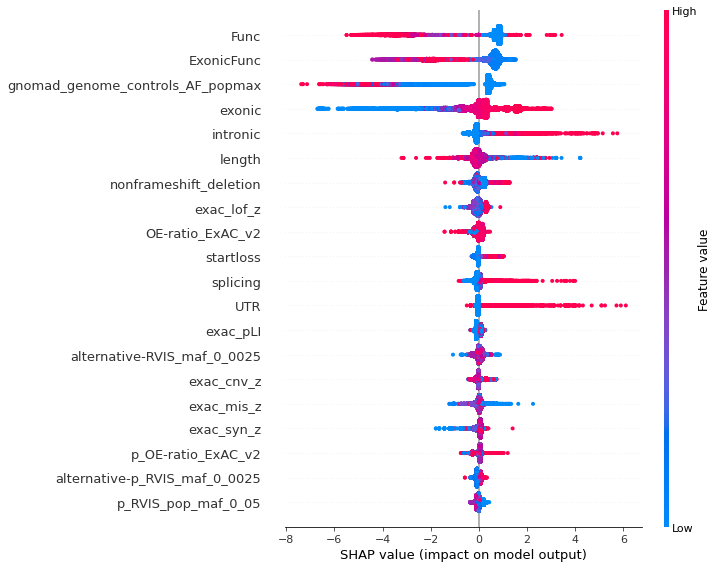

In [45]:
clf=GradientBoostingClassifier(random_state=123,
            loss='exponential',learning_rate=0.3,n_estimators=140,subsample=0.9,
            criterion='squared_error',min_samples_split=4,max_depth=5,
            min_samples_leaf=1,min_weight_fraction_leaf=0,
            min_impurity_decrease=0,
            max_features=None,                        
            max_leaf_nodes=None)
import shap
clf.fit(x_train,y_train)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_train)
#shap.summary_plot(shap_values, x_train)
shap.summary_plot(shap_values, x_train)

In [48]:
shap_df=pd.DataFrame()
shap_df['feature']=x_train.columns.to_list()
shap_df['importance']=np.mean(np.abs(shap_values),axis=0)
shap_df=shap_df.sort_values(by=['importance'],ascending=False)

In [49]:
shap_df

,feature,importance
0,Func,1.135300
1,ExonicFunc,0.969897
2,gnomad_genome_controls_AF_popmax,0.817481
4,exonic,0.715965
7,intronic,0.221946
3,length,0.206636
13,nonframeshift_deletion,0.147661
20,exac_lof_z,0.121477
25,OE-ratio_ExAC_v2,0.101667
15,startloss,0.094628


In [56]:
###(0.9974305248173732, 0.9968597284555056, 0.9704582125264594)
for num in range(29):
    num_sel=shap_df.iloc[:num+1,0].to_list()
    x_train_num=x_train[num_sel]
    x_test1_num=x_test1[num_sel]
    x_test2_num=x_test2[num_sel]
    out=test_test2_auc(clf,x_train_num, y_train,x_test1_num,y_test1,x_test2_num,y_test2)
    print(num+1,out)

1 (0.8889429105714628, 0.9815206208350333, 0.8570402290413777)
2 (0.9555102503817133, 0.9939405684754522, 0.9497996058235335)
3 (0.9833139666634884, 0.9979576675053267, 0.9731738862671004)
4 (0.9949616684638006, 0.9856990854073168, 0.25503397370371794)
5 (0.9961110073226426, 0.9943797089623282, 0.8610134823759761)
6 (0.99637015119439, 0.995406585747314, 0.8839787184167927)
7 (0.9968186982548808, 0.9953561584840656, 0.8815686535756799)
8 (0.9970260081843884, 0.9961777675778594, 0.9243305729393227)
9 (0.9972727232793573, 0.9964693945781766, 0.9319729387121595)
10 (0.9969970163183897, 0.9962450445396437, 0.9177622716844034)
11 (0.9973049192374983, 0.9966036283376398, 0.9410376674345694)
12 (0.9971449730249032, 0.9968902120449703, 0.9659798780218551)
13 (0.9971095471351672, 0.9965345012239902, 0.9536081785627379)
14 (0.9969911766020655, 0.9961434250192664, 0.9472128668011436)
15 (0.9972917411165899, 0.9964318843782584, 0.9530529944446062)
16 (0.9971053611438194, 0.9966200870393037, 0.96254

In [57]:
test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)

(0.9974305248173732, 0.9968597284555056, 0.9704582125264594)

In [58]:
test_test2_auc(clf,x_train, y_train,
               x_test1[test1_star>=2],y_test1[test1_star>=2],
               x_test2[test2_lab.astype('int')>=2],y_test2[test2_lab.astype('int')>=2])

(0.9974305248173732, 0.9979711182718702, 0.9833347626865305)